In [1]:
def dec_to_base(base, n):           
    if (base == "binary") or (base == 2):
        binary = ''
        while (n != 0):
            binary += str(n%2)
            n = int(n/2)
        
        return (binary[::-1])

    elif ((base == "octal") or (base == 8)):   
        octal = ''
        while (n != 0):
            octal += str(n%8)
            n = int(n/8)
        
        return (octal[::-1])
    
    elif (base == "hexadecimal") or (base == 16):

        hex = ''    
        while(n != 0):
            temp = n % 16
 
            if(temp < 10):
                hex += chr(temp + 48)
            else:
                hex += chr(temp + 55)
            n = int(n / 16)
        return (hex[::-1])
    else:
        return "Please enter a correct base"

In [2]:
print(dec_to_base(2, 10))

1010


In [3]:
import pandas as pd

In [4]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### 1. How many movies have the title "Hamlet"?

In [5]:
cast.title.str.count("Hamlet").sum()

891

In [6]:
len(cast[cast.title == "Hamlet"])

299

### 2. List all of the "Treasure Island" movies from earliest to most recent.

In [7]:
cast[cast.title == "Treasure Island"].sort_values(by = 'year')

,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
3280557,Treasure Island,1918,Eleanor Washington,actress,Prologue Player,NaN
3046750,Treasure Island,1918,Violet Radcliffe,actress,Long John Silver,3.0
1167783,Treasure Island,1918,Raymond Lee,actor,Bit Role,NaN
1195421,Treasure Island,1918,Elmo Lincoln,actor,Prologue Player,NaN
...,...,...,...,...,...,...
1663860,Treasure Island,1999,Victor Raider-Wexler,actor,Samowitz,10.0
1731182,Treasure Island,1999,Scot Thomas Robinson,actor,Jimmy,11.0
1813707,Treasure Island,1999,Richard Schave,actor,Man,21.0
2710458,Treasure Island,1999,Stephanie Ittleson,actress,Stella,7.0


### 3. How many roles were credited in the silent 1921 version of Hamlet?

In [8]:
len(cast[(cast.title == "Hamlet") & (cast.year == 1921)])


9

### 4. Use groupby() to plot the number of "Hamlet" films made each decade

In [9]:
hamlet = cast[cast.title == "Hamlet"]
hamlet.groupby(hamlet.year // 10 * 10).size()

year
1910    28
1920     9
1940    25
1950     1
1960    57
1970    19
1980     3
1990    84
2000    55
2010    18
dtype: int64

<AxesSubplot:xlabel='year'>

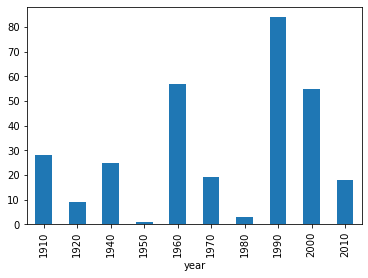

In [10]:
#plot
hamlet.groupby(hamlet.year // 10 * 10).size().plot(kind = 'bar')

### 5. How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [11]:
c = cast[cast.year == 1950]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    271
dtype: int64

### 6. List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

In [12]:
cast[(cast.n == 1) & (cast.year>=1990)].head(10)

,title,year,name,type,character,n
88,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
125,All Things Fall Apart,2011,50 Cent,actor,Deon,1.0
130,Freelancers,2012,50 Cent,actor,Malo,1.0
131,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1.0
132,Gun,2010,50 Cent,actor,Rich,1.0
139,Setup,2011,50 Cent,actor,Sonny,1.0
149,La hora cero,2010,Zapata 666,actor,Parca,1.0
150,Z,2015,Zapata 666,actor,Z,1.0
259,Aravaan,2012,Aadhi,actor,Varipuli,1.0
260,Aravaan,2012,Aadhi,actor,Chinnaan,1.0


### 7. List, in order by year, each of the films in which Frank Oz has played more than 1 role

In [13]:
c = cast[cast.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1].sort_values()

year  title                                   
1981  An American Werewolf in London              2
1982  The Dark Crystal                            2
1985  Sesame Street Presents: Follow that Bird    3
1999  The Adventures of Elmo in Grouchland        3
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
1981  The Great Muppet Caper                      6
1984  The Muppets Take Manhattan                  7
1992  The Muppet Christmas Carol                  7
1979  The Muppet Movie                            8
dtype: int64

In [14]:
#Thank you :)